# 位置编码

## 1 导入相关库

In [68]:
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

## 2 编写代码
位置编码可以有两种形式得到。    
①：用可学习参数，有多少个token就有多少组可学习参数。    
②：使用如下公式。
$$
\begin{align*}
& PE_{(j, 2i)} = \sin\left(\frac{j}{10000^{2i/d}}\right) \\
& PE_{(j, 2i+1)} = \cos\left(\frac{j}{10000^{2i/d}}\right)
\end{align*}
$$
<center>
    <img src="位置编码.png" alt="图片" />
<center>

In [69]:
# 我们假设有100个token，每个token的长度为512
class Position_Encoding(nn.Module):
    def __init__(self, token_nums, token_size):
        super().__init__()
        self.output = torch.zeros((token_nums, token_size), dtype = torch.float)
        for i in range(token_nums):
            self.output[i, :] = i
        """ if token_size % 2 ==0:
            for j in range(token_size // 2):
                self.output[:, 2 * j] = torch.sin(self.output[:, 2 * j] / (1000 ** (( 2 * j) / token_size)))
                self.output[:, 2 * j + 1] = torch.cos(self.output[:, 2 * j + 1] / (1000 ** (( 2 * j) / token_size)))
        else :
            for j in range(token_size // 2):
                self.output[:, 2 * j] = torch.sin(self.output[:, 2 * j] / (1000 ** (( 2 * j) / token_size)))
                self.output[:, 2 * j + 1] = torch.cos(self.output[:, 2 * j + 1] / (1000 ** (( 2 * j) / token_size)))
            self.output[:, 2 * (j + 1)] = torch.sin(self.output[:, 2 * (j + 1)] / (1000 ** (( 2 * (j + 1)) / token_size))) """
        for j in range(token_size // 2):
            self.output[:, 2 * j] = torch.sin(self.output[:, 2 * j] / (1000 ** (( 2 * j) / token_size)))
            self.output[:, 2 * j + 1] = torch.cos(self.output[:, 2 * j + 1] / (1000 ** (( 2 * j) / token_size)))
        if token_size % 2 != 0 :
            self.output[:, 2 * (j + 1)] = torch.sin(self.output[:, 2 * (j + 1)] / (1000 ** (( 2 * (j + 1)) / token_size)))
    
    def forward(self):
        return self.output

## 3 热度图函数
用热度图来将位置编码给画出来

In [70]:
def plot_hotmap(harvest, x_label = None, y_lable = None, hotmap_value = False, rotate_x_text = False, txt = False):
    # 生成图形对象 fig 和 子图对象 ax，使用约束布局避免重叠
    fig, ax = plt.subplots(constrained_layout=True)
    # 设置坐标轴比例
    ax.set_aspect(aspect=1.0)
    # 设置坐标轴范围，更多参数 https://www.wolai.com/matplotlib/9S3VvdWev3tNckFvKcMHKA
    im = ax.imshow(harvest, cmap="coolwarm")
    # # X轴 和 Y轴 上的标签文字
    # ax.set_xticks(np.arange(len(x_ax_text)), labels=x_ax_text)
    # ax.set_yticks(np.arange(len(y_ax_text)), labels=y_ax_text)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_lable)
    # 添加文字注释
    if txt == True:
        harvest = harvest.squeeze()
        # m是行，n是列
        m, n = harvest.shape[-2], harvest.shape[-1]
        print(m, n)
        if hotmap_value:
            for i in range(m):
                for j in range(n):
                    text = ax.text(j, i, harvest.squeeze()[i, j], ha="center", va="center", color="black")
    # 旋转X轴标签文字
    if rotate_x_text:
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    # 添加颜色条
    cbar = fig.colorbar(im, ax=ax, shrink=0.92, aspect=15)
    # 设置颜色条标签
    cbar.set_label("attention value (unit)", fontweight="bold")
    # 保存图片
    # plt.savefig('./热度图.png', dpi=300)
    # 显示图片
    plt.show()

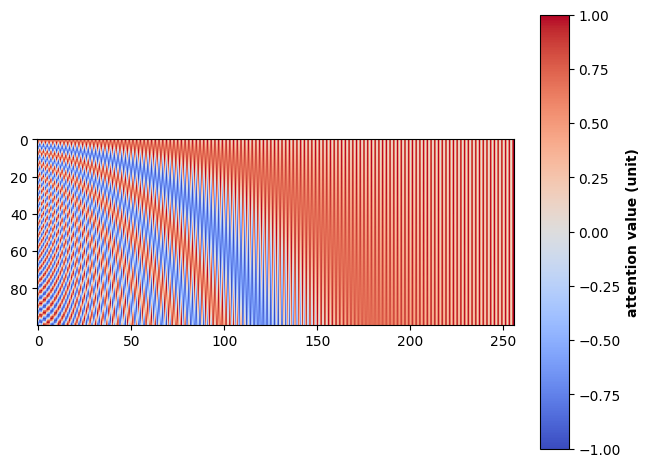

In [71]:
PE = Position_Encoding(100, 256)
a = PE()
plot_hotmap(a)